In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [51]:
input_size=1
output_size=1
hidden_size_1=2
hidden_size_2=4
num_epochs=6000
learning_rate=0.01

x_train=torch.Tensor([[3.3],[4.4],[5.5],[6.71],[6.93],[4.168],[9.779],[6.1820],[7.59],[2.167],[7.042],[10.791],[5.313],[7.997],[3.1]])
y_train=torch.Tensor([[1.7],[2.76],[2.09],[3.19],[1.694],[1.573],[3.366],[2.596],[2.53],[1.221],[2.827],[3.465],[1.65],[2.904],[1.3]])

In [52]:
model=nn.Sequential(nn.Linear(input_size,hidden_size_1),
                   nn.ReLU(),
                   nn.Linear(hidden_size_1,hidden_size_2),
                   nn.ReLU(),
                   nn.Linear(hidden_size_2,output_size))
loss_func=nn.MSELoss()
optim=torch.optim.SGD(model.parameters(),lr=learning_rate)
print("epoch,\tloss")

for epoch in range(num_epochs):
    y_hat=model(x_train)
    loss=loss_func(y_hat,y_train)
    optim.zero_grad()
    loss.backward()
    optim.step()
    if (epoch+1)%600==0:
        print("{},\t{:.4f}".format(epoch+1,loss.item()))

epoch,	loss
600,	0.1689
1200,	0.1688
1800,	0.1688
2400,	0.1687
3000,	0.1687
3600,	0.1686
4200,	0.1686
4800,	0.1685
5400,	0.1685
6000,	0.1684


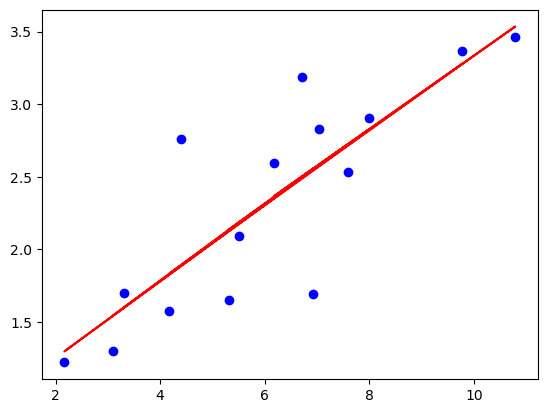

In [53]:
plt.scatter(x_train.numpy(),y_train.numpy(),color="blue")
plt.plot(x_train.numpy(),model(x_train).detach().numpy(),color="red")
plt.show()